In [1]:
library(readr)
data<-read_csv('marketing.csv')

Rows: 200 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): youtube, facebook, newspaper, sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
#b. In thông tin chung từ dữ liệu: head(), số dòng, số cột, str(), summary()
head(data)
nrow(data)
ncol(data)
str(data)
summary(data)

youtube,facebook,newspaper,sales
<dbl>,<dbl>,<dbl>,<dbl>
276.12,45.36,83.04,26.52
53.40,47.16,54.12,12.48
20.64,55.08,83.16,11.16
181.80,49.56,70.20,22.20
216.96,12.96,70.08,15.48
10.44,58.68,90.00,8.64


[1] 200

[1] 4

spc_tbl_ [200 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ youtube  : num [1:200] 276.1 53.4 20.6 181.8 217 ...
 $ facebook : num [1:200] 45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num [1:200] 83 54.1 83.2 70.2 70.1 ...
 $ sales    : num [1:200] 26.5 12.5 11.2 22.2 15.5 ...
 - attr(*, "spec")=
  .. cols(
  ..   youtube = col_double(),
  ..   facebook = col_double(),
  ..   newspaper = col_double(),
  ..   sales = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


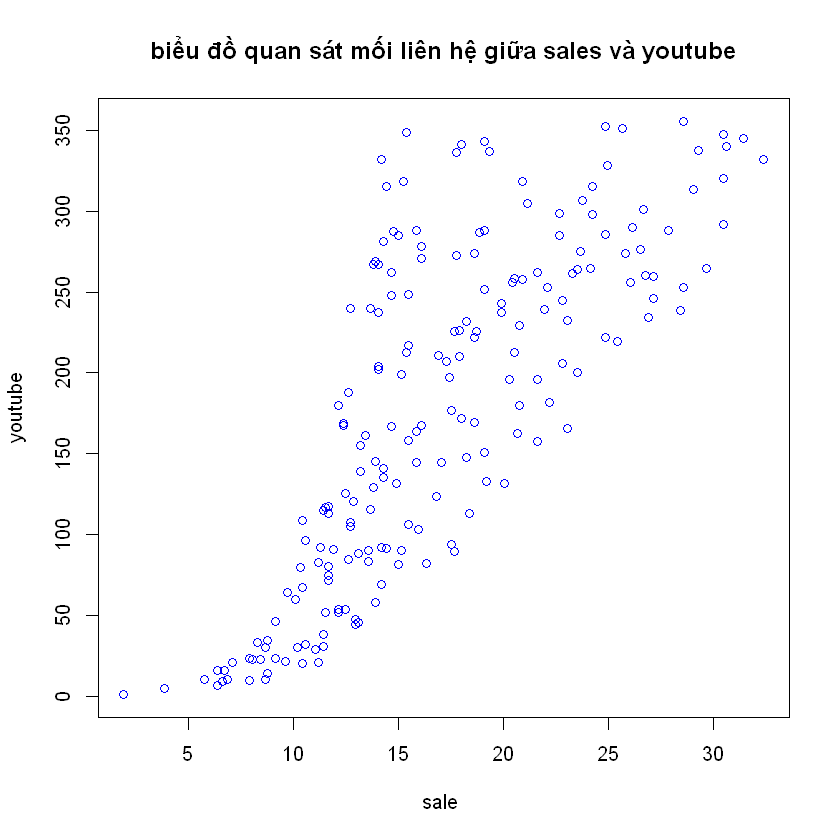

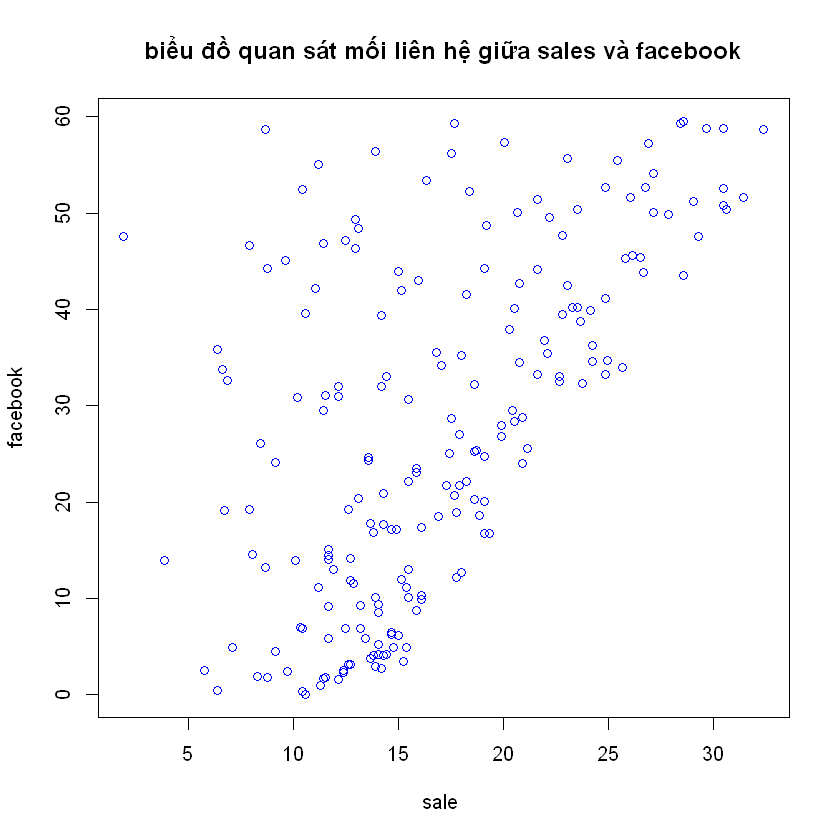

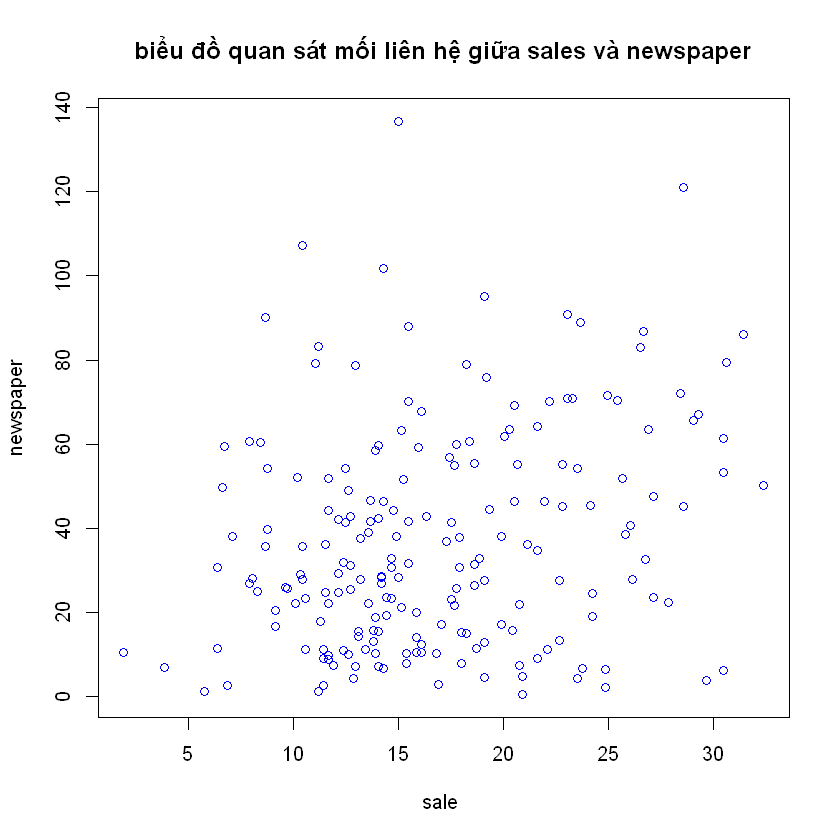

In [3]:
#c. Vẽ biểu đồ quan sát mối liên hệ giữa sales và youtube
library('tidyverse')
plot(data$sales, data$youtube, main="biểu đồ quan sát mối liên hệ giữa sales và youtube",
   xlab="sale ", ylab="youtube",col='blue')
#c. Vẽ biểu đồ quan sát mối liên hệ giữa sales và facebook
plot(data$sales, data$facebook, main="biểu đồ quan sát mối liên hệ giữa sales và facebook",
   xlab="sale ", ylab="facebook",col='blue')
#c. Vẽ biểu đồ quan sát mối liên hệ giữa sales và newspaper
plot(data$sales, data$newspaper, main="biểu đồ quan sát mối liên hệ giữa sales và newspaper",
   xlab="sale ", ylab="newspaper",col='blue')

In [4]:
#d. Tiền xử lý dữ liệu
is.null(data$youtube) 
is.null(data$facebook) 
is.null(data$newspaper) 
#feature youtube ko có null
normalize <- function(x, na.rm = TRUE) {
    return((x- min(x)) /(max(x)-min(x)))
}
data$youtube=normalize(data$youtube)
data$facebook=normalize(data$facebook)
data$newspaper=normalize(data$newspaper)
data$sales=normalize(data$sales)
#scale data

[1] FALSE

[1] FALSE

[1] FALSE

In [5]:
#e. Kiểm tra và xử lý outliers
lowerq = quantile(data$youtube)[2]
upperq = quantile(data$youtube)[4]
iqr = upperq - lowerq
extreme.threshold.upper = (iqr * 1.5) + upperq
extreme.threshold.lower = lowerq - (iqr * 1.5)
extreme.threshold.upper
extreme.threshold.lower
cat('number of oulier:',nrow(data %>% filter(data$youtube>1.47040919851201)))


75% 
1.470409

25% 
-0.4835982

number of oulier: 0

In [6]:
lowerq = quantile(data$facebook)[2]
upperq = quantile(data$facebook)[4]
iqr = upperq - lowerq
extreme.threshold.upper = (iqr * 1.5) + upperq
extreme.threshold.lower = lowerq - (iqr * 1.5)
extreme.threshold.upper
extreme.threshold.lower
cat('number of oulier:',nrow(data %>% filter(data$facebook>1.53931451612903)))

75% 
1.539315

25% 
-0.6018145

number of oulier: 0

In [7]:
lowerq = quantile(data$newspaper)[2]
upperq = quantile(data$newspaper)[4]
iqr = upperq - lowerq
extreme.threshold.upper = (iqr * 1.5) + upperq
extreme.threshold.lower = lowerq - (iqr * 1.5)
extreme.threshold.upper
extreme.threshold.lower
cat('number of oulier:',nrow(data %>% filter(data$newspaper>0.82080035180299)))

75% 
0.8208004

25% 
-0.3172823

number of oulier: 2

In [8]:
data<-data%>%filter(data$newspaper<=0.82080035180299)

In [9]:
nrow(data)

[1] 198

loại bỏ 2 outlier

In [10]:
#f. Tạo train:test từ dữ liệu data với tỉ lệ 70:30 hoặc 80:20
set.seed(42)
trainingRowIndex<-sample(1:nrow(data),0.7*nrow(data))

In [11]:
trainingData<-data[trainingRowIndex,]
testData<-data[-trainingRowIndex,]

In [12]:
#g. Thực hiện Linenear Regression với train data.
lmMod<-lm(data$sales~data$youtube+data$facebook+data$newspaper,data=trainingData)

In [13]:
#h. In summary của model
summary(lmMod)


Call:
lm(formula = data$sales ~ data$youtube + data$facebook + data$newspaper, 
    data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34806 -0.03516  0.00978  0.04706  0.11116 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.054486   0.012476   4.367 2.04e-05 ***
data$youtube    0.531915   0.016472  32.293  < 2e-16 ***
data$facebook   0.368193   0.016911  21.772  < 2e-16 ***
data$newspaper -0.005272   0.028176  -0.187    0.852    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06667 on 194 degrees of freedom
Multiple R-squared:  0.8954,	Adjusted R-squared:  0.8938 
F-statistic: 553.5 on 3 and 194 DF,  p-value: < 2.2e-16


In [14]:
#i. Dự đoán y_test_predict từ test data => so sánh y_test_pred với y_test
y_test_predict<-predict(lmMod,testData)
mse<-mean(lmMod$residuals^2)
print(paste('mse in test:',mse))

Warning message:
"'newdata' had 60 rows but variables found have 198 rows"


[1] "mse in test: 0.00435566243539186"


In [15]:
#j. Tính Mean Square Error (mse), r^2 cho train, r^2 cho test. Nhận xét.
mse_train<-mean((trainingData$youtube-y_test_predict)^2)
print(paste('mse in train:',mse_train))
mse_test<-mean((testData$youtube-y_test_predict)^2)
print(paste('mse in test:',mse_test))

Warning message in trainingData$youtube - y_test_predict:
"longer object length is not a multiple of shorter object length"


[1] "mse in train: 0.14111241523807"


Warning message in testData$youtube - y_test_predict:
"longer object length is not a multiple of shorter object length"


[1] "mse in test: 0.137382090141246"


Nhận xét: mse tương đối tốt, tuy nhiên do biến output là continuous nên giá trị dự đoán củng đc coi là xấp xỉ giá trị thực

In [16]:
#k. Tìm Coefficients, Intercept
print(coef(lmMod))
Intercept<-coef(lmMod)['(Intercept)']
print(paste('Intercept:',Intercept))

   (Intercept)   data$youtube  data$facebook data$newspaper 
   0.054485768    0.531914729    0.368193042   -0.005271667 
[1] "Intercept: 0.0544857680077927"


In [17]:
coef(lmMod)

(Intercept)   data$youtube  data$facebook data$newspaper 
   0.054485768    0.531914729    0.368193042   -0.005271667